# Vérification de la correlation entre l'augmentation : 
- de la température terrestre
- de la température des mers

et de l'élévation du niveau des mers

## Import des Data Set

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Import dataframe temp earth
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/15V0elHWG_3lwsGxfIxcSpclG_BHKj0I4qFsNbhwPr3M/edit#gid=1560380924')


In [0]:
sheet = wb.worksheet('exportMergeTempEarthGlobal')
data = sheet.get_all_values()
df_temp_earth = pd.DataFrame(data)

In [0]:
#Import dataframe temp Sea
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/12UMZtxnqNRP5dCzkNGCvMnXU7FHXlHweBzjw2VsAmag/edit#gid=476831321')


In [0]:
sheet = wb.worksheet('exportMergeTempSeaGlobal')
data = sheet.get_all_values()
df_temp_sea = pd.DataFrame(data)

In [0]:
#Import dataframe level Sea
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1MDvGedDh1O39ktOnF3DJZY_g8P68SxdeU8ud-_EAi6k/edit#gid=2020090465')


In [0]:
sheet = wb.worksheet('exportMergeSeaLevelRize')
data = sheet.get_all_values()
df_temp_levelSea = pd.DataFrame(data)

In [0]:
# remodelage des colonnes : df_temp_earth
df_temp_earth.columns = df_temp_earth.iloc[0]
df_temp_earth = df_temp_earth.iloc[1:]
df_temp_earth.reset_index(drop=True, inplace=True)
df_temp_earth.head()

0 dates AverageTemperature
0  1743            5.18414
1  1744          9.8378975
2  1745           1.387125
3  1750        9.129352727
4  1751          9.1673875

In [0]:
df_temp_earth.tail()

0   dates AverageTemperature
262  2009        19.54638533
263  2010        19.62980613
264  2011        19.45604029
265  2012        19.46758537
266  2013        19.85089675

In [0]:
# remodelage des colonnes : df_temp_sea
df_temp_sea.columns = df_temp_sea.iloc[0]
df_temp_sea = df_temp_sea.iloc[1:]
df_temp_sea.reset_index(drop=True, inplace=True)
df_temp_sea.head()

0  Year Annual_anomaly
0  1880     -0.4700088
1  1881     -0.3568788
2  1882     -0.3726612
3  1883      -0.448443
4  1884     -0.5897538

In [0]:
df_temp_sea.tail()

0    Year Annual_anomaly
131  2011      0.4286736
132  2012       0.528696
133  2013      0.5846742
134  2014      0.7512552
135  2015       0.935577

In [0]:
# remodelage des colonnes : df_temp_levelSea
df_temp_levelSea.columns = df_temp_levelSea.iloc[0]
df_temp_levelSea = df_temp_levelSea.iloc[1:]
df_temp_levelSea.reset_index(drop=True, inplace=True)
df_temp_levelSea.head()

0  Year CSIRO_Adjusted_Sea_Level
0  1880                        0
1  1881              0.220472441
2  1882             -0.440944881
3  1883             -0.232283464
4  1884              0.590551181

In [0]:
df_temp_levelSea.tail()

0    Year CSIRO_Adjusted_Sea_Level
130  2010              8.901574794
131  2011               8.96456692
132  2012              9.326771644
133  2013              8.980314951
134  2014              8.663700393

## Merge des trois dataframes et nettoyage

In [0]:
#Merge nos trois dataframe
#df_merge1 = df_temp_earth.merge(df_temp_sea, how="inner", left_on=None, right_on=None)
#df_temp_levelSea
data_merge = df_temp_earth.merge(df_temp_sea,left_on='dates', right_on='Year').merge(df_temp_levelSea,left_on='dates', right_on='Year').drop(columns=['Year_x', 'Year_y']).rename(columns={'dates':'Years'}) 

In [0]:
data_merge.tail()

0   Years AverageTemperature Annual_anomaly CSIRO_Adjusted_Sea_Level
129  2009        19.54638533      0.5894424              8.586614164
130  2010        19.62980613      0.6127182              8.901574794
131  2011        19.45604029      0.4286736               8.96456692
132  2012        19.46758537       0.528696              9.326771644
133  2013        19.85089675      0.5846742              8.980314951

In [0]:
# Export du dataframe merge : 
data_merge.to_csv('MergeTemp_Level.csv', index = False)

In [0]:
data_merge.rename({'AverageTemperature' : 'AverageTempEarth', 'Annual_anomaly' : 'AverageAnomalyTempSea', 'CSIRO_Adjusted_Sea_Level' : 'SeaLevelRize'}, axis=1, inplace=True)

In [0]:
data_merge.head()

0 Years AverageTempEarth AverageAnomalyTempSea  SeaLevelRize
0  1880      17.76001272            -0.4700088             0
1  1881      17.91458936            -0.3568788   0.220472441
2  1882          17.8198            -0.3726612  -0.440944881
3  1883      18.01105629             -0.448443  -0.232283464
4  1884      17.87011415            -0.5897538   0.590551181

In [0]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Years                  134 non-null    object
 1   AverageTempEarth       134 non-null    object
 2   AverageAnomalyTempSea  134 non-null    object
 3   SeaLevelRize           134 non-null    object
dtypes: object(4)
memory usage: 5.2+ KB


In [0]:
# Convertir les trois relevés en int.
data_merge['AverageTempEarth'] = pd.to_numeric(data_merge['AverageTempEarth'], errors='coerce')
data_merge['AverageAnomalyTempSea'] = pd.to_numeric(data_merge['AverageAnomalyTempSea'], errors='coerce')
data_merge['SeaLevelRize'] = pd.to_numeric(data_merge['SeaLevelRize'], errors='coerce')

In [0]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Years                  134 non-null    object 
 1   AverageTempEarth       134 non-null    float64
 2   AverageAnomalyTempSea  134 non-null    float64
 3   SeaLevelRize           134 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.2+ KB


In [0]:
# Calcul du coefficient de correlation avec Pandas

#print(data_merge[['AverageTempEarth', 'AverageAnomalyTempSea', 'SeaLevelRize']].corr(method='pearson'))

data_merge['AverageTempEarth'].corr(data_merge['AverageAnomalyTempSea'])

0.7990862672573648

In [0]:
data_merge['AverageTempEarth'].corr(data_merge['SeaLevelRize'])

0.8778875914384908

In [0]:
data_merge['AverageAnomalyTempSea'].corr(data_merge['SeaLevelRize'])

0.8583897853146274

In [0]:
data_merge.head()

0 Years  AverageTempEarth  AverageAnomalyTempSea  SeaLevelRize
0  1880         17.760013              -0.470009      0.000000
1  1881         17.914589              -0.356879      0.220472
2  1882         17.819800              -0.372661     -0.440945
3  1883         18.011056              -0.448443     -0.232283
4  1884         17.870114              -0.589754      0.590551

## Visualisation avec regression linéaire et des coefficients de correlation

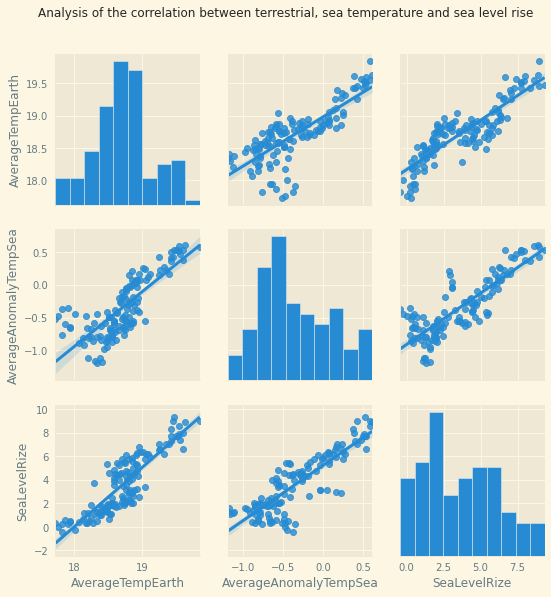

In [0]:
# Visualisation
#df = data_merge[['AverageTempEarth', 'AverageAnomalyTempSea', 'SeaLevelRize']]
with plt.style.context('Solarize_Light2'):
  g = sns.pairplot(data_merge, vars=('AverageTempEarth', 'AverageAnomalyTempSea', 'SeaLevelRize'), palette = 'husl',kind ='reg')
#plt.title('Analyse des corrélations')
g.fig.suptitle("Analysis of the correlation between terrestrial, sea temperature and sea level rise", y=1.08)

plt.show()
g.fig.savefig("VizReg_LinTempEarthSeaLevelSea.png")

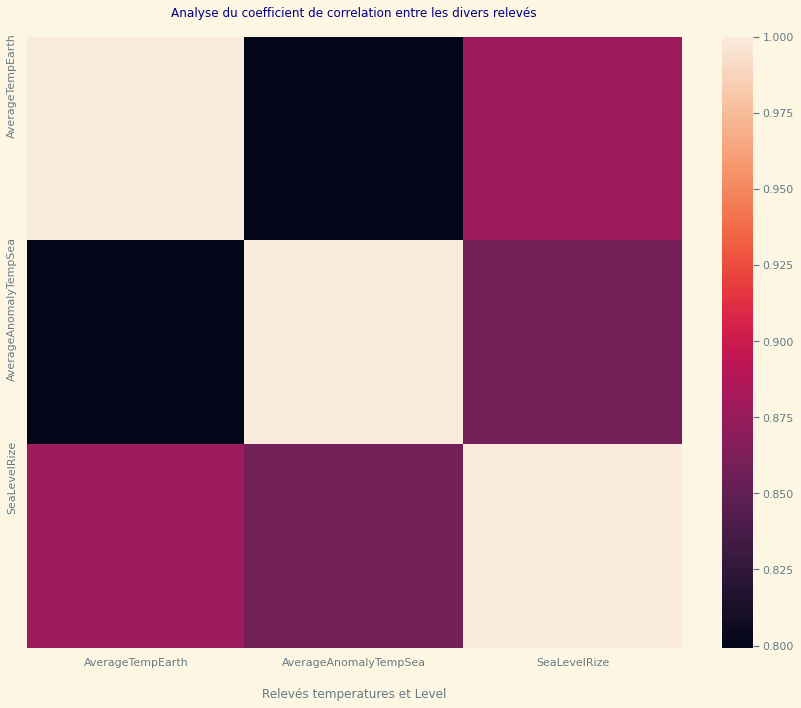

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
corr = data_merge.corr()
x_axis_labels = ["T_Earth", "T_Sea", "Sea Level"] # labels for x-axis
y_axis_labels = ["T_Earth", "T_Sea", "Sea Level"] # labels for y-axis
with plt.style.context('Solarize_Light2'):
  g=sns.heatmap(data_merge.corr())

#plt.xticks(rotation='45')
plt.title('Analyse du coefficient de correlation entre les divers relevés', color = 'navy', pad=20, )
plt.xlabel('Relevés temperatures et Level', labelpad=20)
plt.ylabel('', labelpad=13)
plt.yticks(range(0,3))
plt.tight_layout()

plt.show()


In [0]:
import numpy as np
import seaborn as sns
sns.set(style="white")

corr = data_merge.corr()
x_axis_labels = ["T_Earth", "T_Sea", "Sea Level"] # labels for x-axis
y_axis_labels = ["T_Earth", "T_Sea", "Sea Level"] # labels for y-axis

# Creating a mask the size of our covariance matrix
#mask = np.zeros_like(corr, dtype=bool)
#mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11,9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1,center=0,square=True, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            linewidth=.5, cbar_kws={'ticks': [0.800, 0.825,0.850, 0.875, 0.900, 0.925, 0.950, 0.975, 1.0]})

ax.set_ylabel('')
ax.set_xlabel('')


label1 = "T_Earth : Earth's surface average temperature" 
label2 = "T_Sea : Sea average temperature anomaly" 
label3 = "Sea Level : Variation of Sea Level"

fig.text(0.7, 0.86, label1, family='serif', style='italic', ha='right', wrap=True, fontsize=10)
fig.text(0.7, 0.83, label2, family='serif', style='italic', ha='right', wrap=True, fontsize=10)
fig.text(0.7, 0.80, label3, family='serif', style='italic', ha='right', wrap=True, fontsize=10)

#ax.set_title('Correlation between Average Temperature of Earth\'s surface, Temperature of Sea\'s and Variation of Sea level', fontsize = 18)
